# Final project - Porgramming for Datascience - EDA - 2025

The notebook must be returned completed before May 12, 2025 to jean.delpech@adalab.fr

Zeinabou Amadou:Hailikoye & Damien Levacher

We chose the dataset  :

https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees

You will conduct an EDA on the dataset of your choice.

Your work should demonstrate the skills you have acquired:

* data understanding (expose the context, what are the data, type, etc.)
* preparing this data for future exploration and analysis
* assessing data quality (missing values? outliers? If so, how do you manage them?)
* creating insightful visualizations that inform your understanding of the data
* identifying trends, formulating hypotheses, justifying choices (why this model, why this hypothesis, etc.)
* conducting analyses concerning relationships between variables
* interpreting analysis results (statistical inference, significance, etc.)
* concluding by highlighting limitations and perspectives
* the quality of the notebook will also be assessed: clarity, rigor in writing the code, structuring the analysis process and layout, readability, etc.

# 1/Introduction and context
The industrialization that began in the 19th century is a major event whose consequences are well-documented. One of the sectors most affected is manufacturing, and more specifically, the clothing industry. This industry experiences a high global demand for clothing, and meeting this enormous demand depends primarily on production performance and, therefore, the productivity of garment company employees. It is therefore essential for decision-makers in the sector to monitor, analyze, and predict the productivity of their factory teams in order to sustain their businesses. With this in mind, the work "Mining the Productivity Data of the Garment Industry" by authors Abdullah Al Imran, Md Shamsur Rahim, and Tanvir Ahmed, published in 2021, will be the subject of our group project. By conducting an EDA (exploratory data analysis), it will allow us to better understand their database and the fundamental statistical analyses we can derive from it. Our project will focus on exploring a real-world dataset collected in a textile factory. After presenting the context and available variables, we will proceed with a data preparation phase (cleaning, formatting, and addressing missing and outlier values).
We will then create statistical visualizations using Matplotlib and Seaborn to better understand the data structure and identify potential trends or correlations. This will allow us to formulate hypotheses about the factors influencing productivity.
Finally, we will analyze the relationships between variables, interpret the results, and conclude with a discussion on the limitations of our study and avenues for future research.


# 2. Data Understanding
Let's start by importing the database and the libraries we will need to complete our project.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [13]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
productivity_prediction_of_garment_employees = fetch_ucirepo(id=597)

# data (as pandas dataframes)
X = productivity_prediction_of_garment_employees.data.features
y = productivity_prediction_of_garment_employees.data.targets

# metadata
print(productivity_prediction_of_garment_employees.metadata)

# variable information
print(productivity_prediction_of_garment_employees.variables)


{'uci_id': 597, 'name': 'Productivity Prediction of Garment Employees', 'repository_url': 'https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees', 'data_url': 'https://archive.ics.uci.edu/static/public/597/data.csv', 'abstract': 'This dataset includes important attributes of the garment manufacturing process and the productivity of the employees which had been collected manually and also been validated by the industry experts.', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 1197, 'num_features': 14, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['actual_productivity'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C51S6D', 'creators': [], 'intro_paper': {'ID': 399, 'type': 'NATIVE', 'title': 'Mining the productivity dat

We observe that this database contains 15 variables of which actual_productivity represents the actual percentage of worker productivity. This is a continuous variable between 0 and 1 according to the website, where 1 corresponds to 100% productivity. However, using a max and min the exported values are for maximum 1.2 and for minimu 0.23. This variable serves as a target for regression tasks aimed at predicting employee productivity based on auxiliary factors in the database such as wip (work in progress which represents the number of pieces in production at a given time. This indicates the workload not yet completed) and smv (Standard Minute Value which corresponds to the standard time (in minutes) required to produce a unit (garment) according to established standards).

In [15]:
df = pd.read_csv("garments_worker_productivity.csv")
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

df.info() allows us to observe the structure of the dataset, including the number of entries and data types (the day column is of type interger,  actual_productivity of type float). We notice that the date column is of type object, so we convert it to timestamp format for easier temporal analysis.

# 3. Data Preparation

In [19]:
#turn date in timestamps
df['date'] = pd.to_datetime(
    df['date'])
df['idle_time'] = df['idle_time'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    691 non-null    float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   int64         
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

Let's rename wip and smv so that we can understand their intuition

In [21]:
df.rename(columns={'wip':'work_in_progress','smv':'standard_minute_value'}, inplace=True)
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'standard_minute_value', 'work_in_progress', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity'],
      dtype='object')

We check for duplicates. Here there is none.

In [23]:
sum(df.duplicated()) # => no duplicates

0

In [24]:
df.nunique()

date                      59
quarter                    5
department                 3
day                        6
team                      12
targeted_productivity      9
standard_minute_value     70
work_in_progress         548
over_time                143
incentive                 48
idle_time                 11
idle_men                  10
no_of_style_change         3
no_of_workers             61
actual_productivity      879
dtype: int64

# 4. Data Quality Assessment and processing
## 4.1 Outliers Detection
### a. Definition and observation
According to Wikipedia, a definition of an outlier can be defined this way :
"In statistics, an outlier is a value or observation that is "distant" from other observations made on the same phenomenon, that is, it contrasts greatly with the "normally" measured values. An outlier may be due to the variability inherent in the observed phenomenon, or it may indicate experimental error. In the latter case, they are sometimes discarded."
These outliers can be identified using various methods, the simplest of which is a graphical representation of a box plot of our database. Let's visualize this box plot using the Matplotlib and Seaborn libraries.

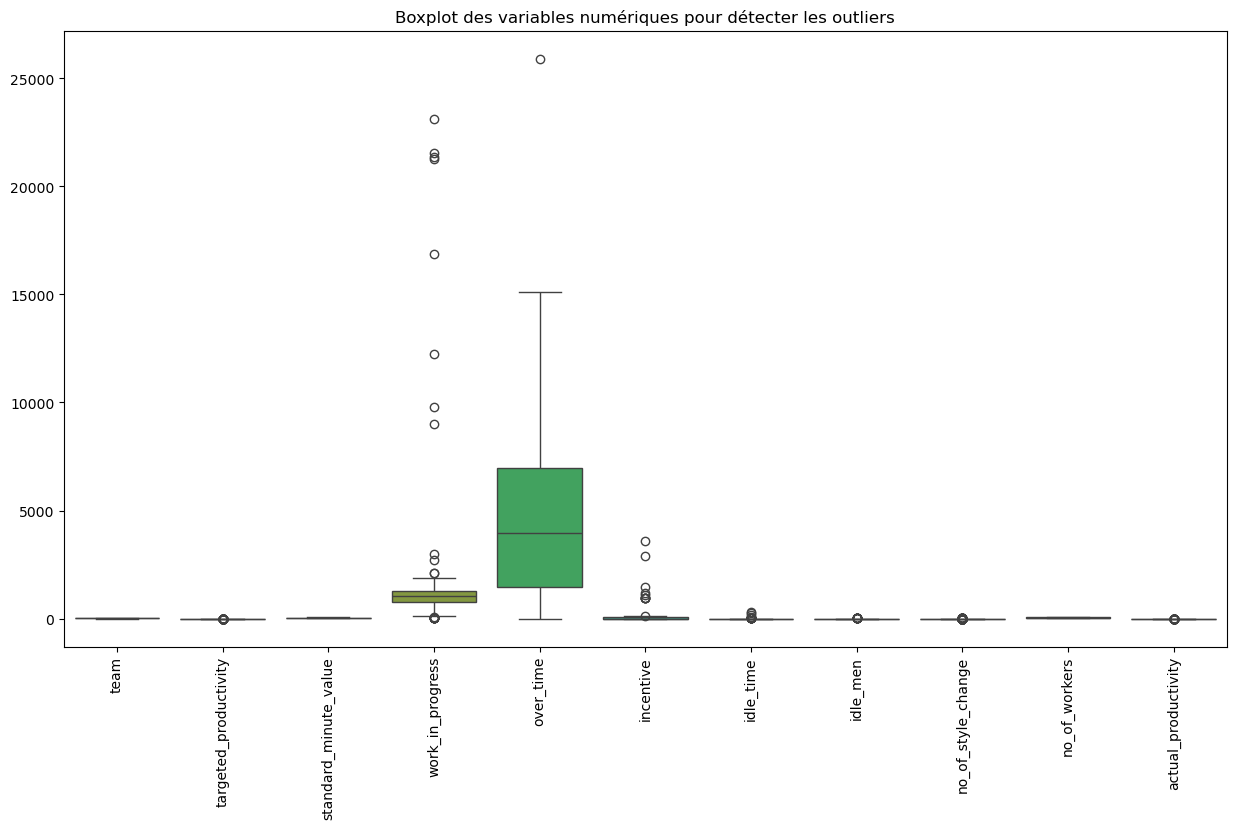

In [26]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.xticks(rotation=90)
plt.title("Boxplot des variables numériques pour détecter les outliers")
plt.show()

### b. Interpretation
The boxplot reveals the presence of outliers in several numerical variables, notably work_in_progress, over_time, and incentive, which display exceptionally high values. Minor outliers are also observed in idle_time, idle_men, and no_of_style_change. These extreme values may distort statistical interpretations and model performance. To ensure reliable analysis, a correction or appropriate treatment of these outliers is required.

### c. outlier processing: winsorization method


To handle outliers, we use a method called winsorization, named after biostatistician Charles Winsor. Instead of removing extreme values, we replace them with predefined thresholds. Values above the 95th percentile are set to the 95th percentile value, and similarly, values below the 5th percentile are brought up to that threshold. This ensures the sample size remains unchanged while reducing the influence of extreme values. The process must be symmetric, carefully adjusting both tails of the distribution. This helps stabilize the data without distorting its over all structure.
This method is used on numerical values which is okay for our database since only numerical values columns have outliers here.

/Users/macbook/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return bound(*args, **kwds)


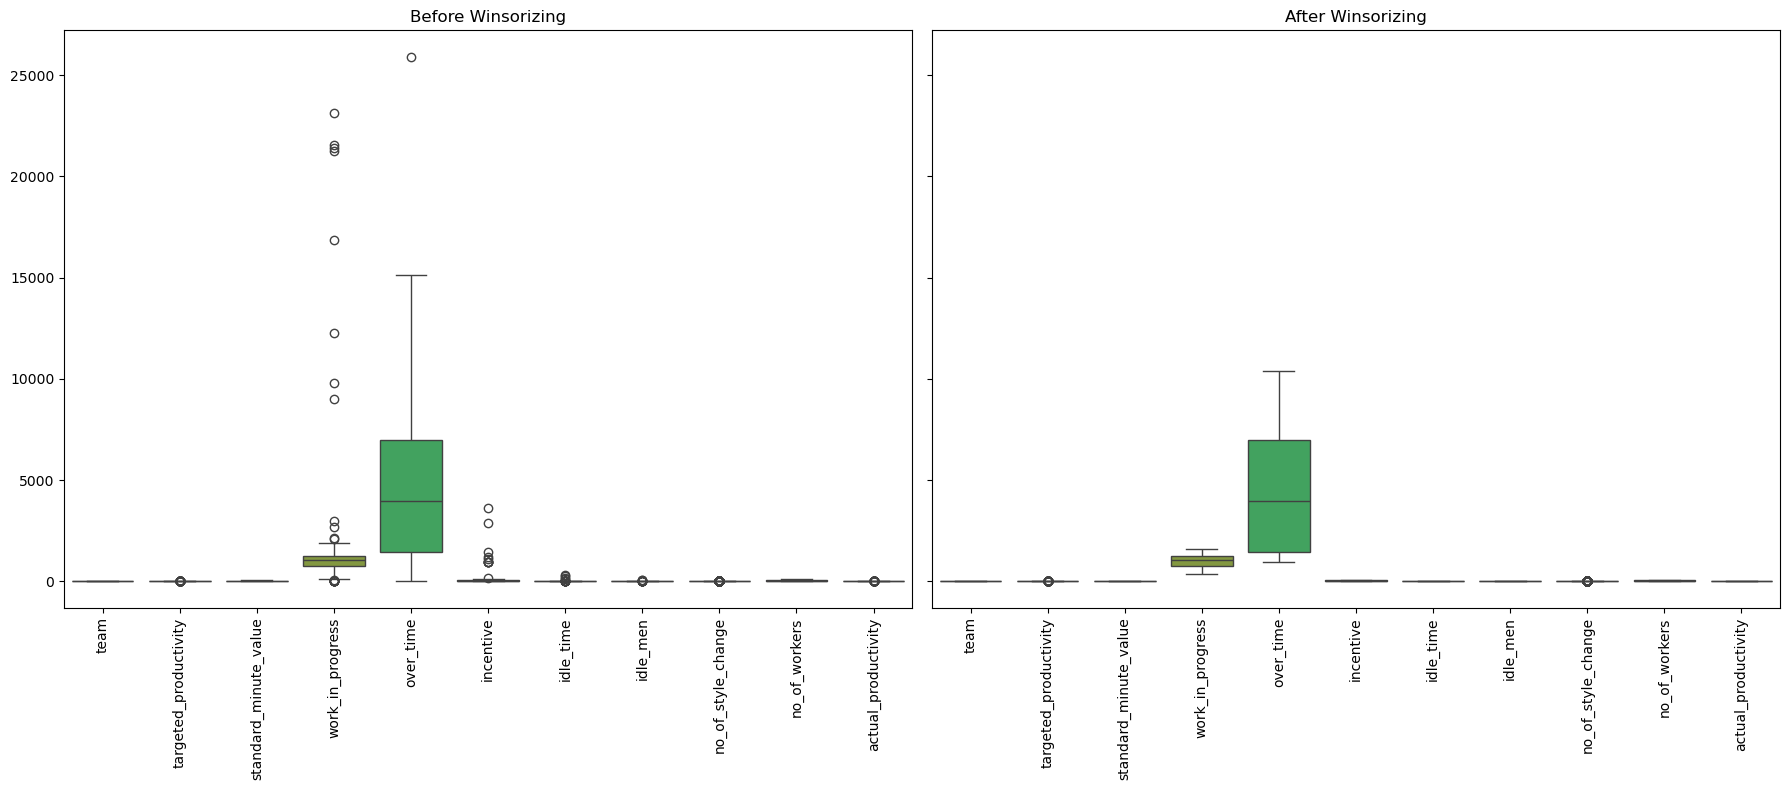

In [29]:

# Step 1: Save a copy of the original data before winsorizing
df_before_winsorizing = df.copy()

# Step 2: Define a winsorizing function
def winsorize(series, lower_quantile=0.05, upper_quantile=0.95):
    """
    This function applies winsorization to a given series based on specified quantiles.
    """
    # Calculate the lower and upper quantiles
    lower = series.quantile(lower_quantile)
    upper = series.quantile(upper_quantile)

    # Apply winsorization by clipping the outliers
    return np.clip(series, lower, upper)

# Step 3: Select numerical columns and apply winsorization to all
num_cols = df.select_dtypes(include=np.number).columns  # This allows to select all numerical columns

# Apply winsorization to all numerical columns
for col in num_cols:
    df[col] = winsorize(df[col])

# Step 4: Plot side-by-side boxplots for visual comparison
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# Boxplot before winsorizing
sns.boxplot(data=df_before_winsorizing[num_cols], ax=axes[0])
axes[0].set_title("Before Winsorizing")
axes[0].tick_params(axis='x', rotation=90);

# Boxplot after winsorizing
sns.boxplot(data=df[num_cols], ax=axes[1])
axes[1].set_title("After Winsorizing")
axes[1].tick_params(axis='x', rotation=90)

# This will display the plots
plt.tight_layout()
plt.show()


## 4.2 Missing values detection
### a. Definition and observation
A missing value refers to a data point that is absent from a dataset. Like outliers, missing values can distort analysis by affecting the estimation of distributions, model parameters, and variance. Additionally, they can introduce bias if the missing data follows a specific pattern (e.g., errors during data collection or issues in a particular location or time) and can reduce the statistical power of analyses by limiting the effective sample size, making it harder to detect significant relationships between variables.
We can observe it with the function isna() or with a vizualisation

In [31]:
# Is there missing values
df.isna().sum()


date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
standard_minute_value      0
work_in_progress         506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

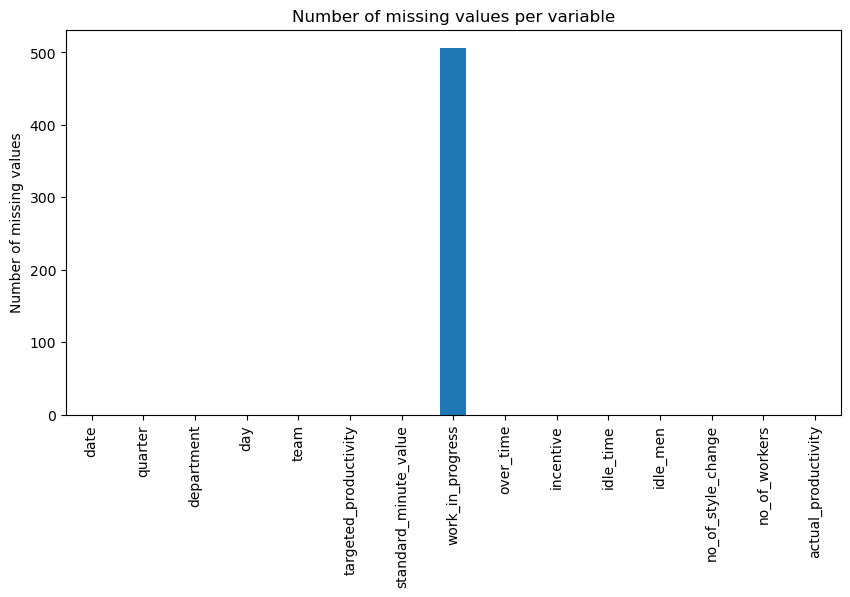

In [32]:
#vizualisation
df.isnull().sum().plot(kind='bar', figsize=(10,5), title="Number of missing values ​​per variable")
plt.ylabel("Number of missing values")
plt.xticks(rotation=90)
plt.show()


### b. Interpretation
We observe that only the wip variable has missing values. We now need to determine the best way to handle them. We will have two approaches. in this part:

b.1. Analysis of Missing Values ​​by Department
To understand the origin of the NaNs in the WIP column, we will begin by examining the distribution of these missing values ​​by production department. Specifically, we will verify whether the NaNs are concentrated in the Finishing department or if they are more generally distributed across other departments.

Indeed, it is possible that the missing values ​​are related to the fact that the Finishing department does not involve Work In Progress, which would justify the absence of WIP in this department. We will use cluster analysis to count the number of missing values ​​in WIP by department. This will allow us to determine whether the NaNs are specifically associated with the Finishing department or if they are present randomly throughout the dataset.

b.2 Approach to handling missing values

1. If the NaNs are mainly present in the finishing department: We will assume that these missing values ​​are normal and not due to a data problem. In this case, it is reasonable to replace these NaNs with 0, as this reflects the absence of work in progress in this department.

2. If the NaNs are distributed across other departments as well: In this case, we will assume that the missing values ​​are due to data problems or missing processes. We will then consider another method of correction (such as imputation by the mean) and which will be chosen based on the nature of the missing data.
   
In summary, we will analyze the distribution of missing values ​​to determine whether it is more appropriate to replace them with 0 (when they are related to the finishing department) or to perform another method of handling the missing values. The way we handle these missing values in this case depends on their underlying nature—whether they are missing completely at random, at random depending on other variables, or not at random due to inherent limitations in the data collection process.

#### b.1 Analysis of Missing Values ​​by Department
By observing the database, we see that only the finishing departments have a missing work in progress value as shown in the graph below.


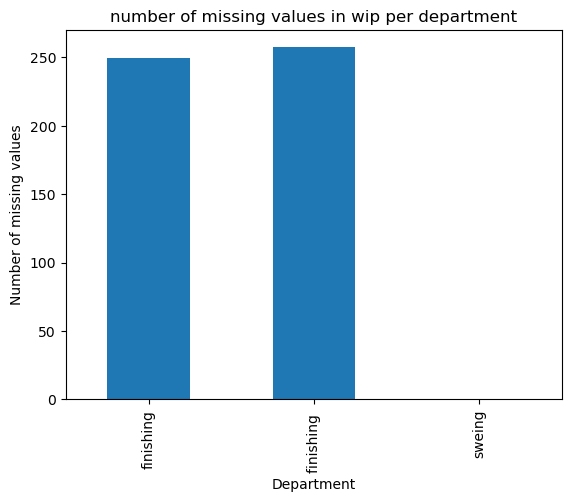

In [35]:
df.groupby('department')['work_in_progress'].apply(lambda x: x.isna().sum()).plot(kind='bar')
plt.title('number of missing values in wip per department')
plt.xlabel('Department')
plt.ylabel('Number of missing values')
plt.show()


When doing the code, we observe that the values ​​of the department column have duplicates at the finishing level. Let's correct it.

In [37]:
df['department'] = df['department'].str.strip()
print(df['department'].unique())


['sweing' 'finishing']


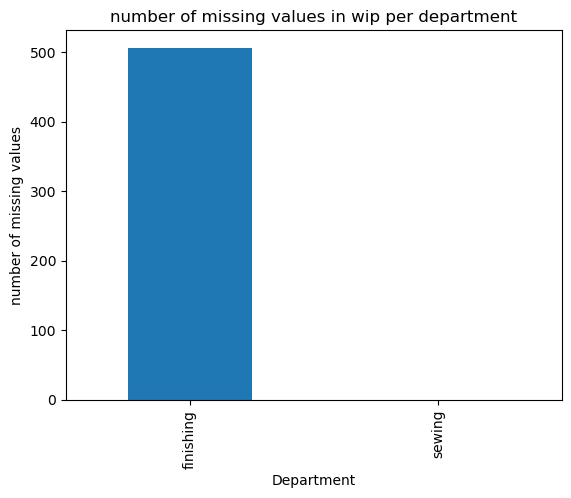

In [38]:
df['department'] = df['department'].replace('sweing', 'sewing') # Sewing is not written correctly we renamed sweing to sewing
df.groupby('department')['work_in_progress'].apply(lambda x: x.isna().sum()).plot(kind='bar')
plt.title('number of missing values in wip per department')
plt.xlabel('Department')
plt.ylabel('number of missing values')
plt.show()

In [39]:
# The number of finishing department
# Compter le nombre de 'finishing' en utilisant sum()
count_finishing = (df['department'] == 'finishing').sum()
print(f"Missing values for finishing only : {count_finishing}")

# The number of missing values in
mv = df["work_in_progress"].isna().sum()
print(f"Missing in values in total : {mv}")


Missing values for finishing only : 506
Missing in values in total : 506


Conclusion :
We see that NaNs are only present in the finishing department: We will assume that these missing values ​​are normal and not due to a data problem. In this case, it is reasonable to replace these NaNs with 0, as this reflects the absence of work in progress in this department.

#### b.2 Approach to handling missing values : replacing these NaNs with 0


In [42]:
df['work_in_progress'] = df['work_in_progress'].fillna(0)
mv = df['work_in_progress'].isna().sum()
print(f"Missing in values in total : {mv}")

Missing in values in total : 0


#### b.3 NB – General case: handling NaN values
If missing values in the work_in_progress column had not been strictly associated with the finishing department, we would have used a different approach to understand their origin. Specifically, as we saw in the course "S3-EDA-Recap", we could have built a regression model to predict wip using relevant explanatory variables such as actual_productivity and targeted_productivity. By analyzing the significance of the predictors and the model’s performance, we could assess whether the missingness in wip was related to these variables—suggesting a Missing At Random (MAR) mechanism.

If the regression model showed that these variables significantly explained the variance in wip, and that missing values occurred conditionally on them, we would confirm that the data are MAR. In this case, a model-based imputation method—using the fitted regression model to estimate the missing values—would be more appropriate than a simplistic approach like imputing zeros or means. This would ensure that the relationships among variables are preserved and that statistical bias is minimized.
But in the contrary, if the missing values in the wip column were not explained by the finishing department and did not follow a clear pattern, we would have to consider the nature of the missingness. If the missingness were Missing Completely at Random (MCAR), meaning the missing values have no relationship with other variables, we could simply remove the missing data or replace them with the mean or median of the column. However, if the missingness were Missing at Random (MAR), where the missing values depend on other observed variables, then a more advanced technique, like model-based imputation or Multiple Imputation by Chained Equations (MICE), would be recommended to maintain the integrity of the data. If the missingness were Not Missing at Random (NMAR), meaning the missing values are related to unobserved data, more complex approaches like pattern mixture models would be necessary.



### CONCLUSION : choice of the definitive method
Both approaches to handling missing values are valid (wether replace by 0 or test the regression to find the nature of the missing value and whether use an imputation by the mean if it were MCAR or use another method in other cases). However, since 100% of the missing values in the wip column are explained by the department (i.e they only occur in finishing), we choose the first method—replacing NaN values with 0—and proceed with the resulting dataset.

# 5. Exploratory Visualizations
After assessing the quality of the data and dealing with outliers and missing values, it is now possible to visualize our data.

## 5.1 Histogram with KDE (Kernel Density Estimate)


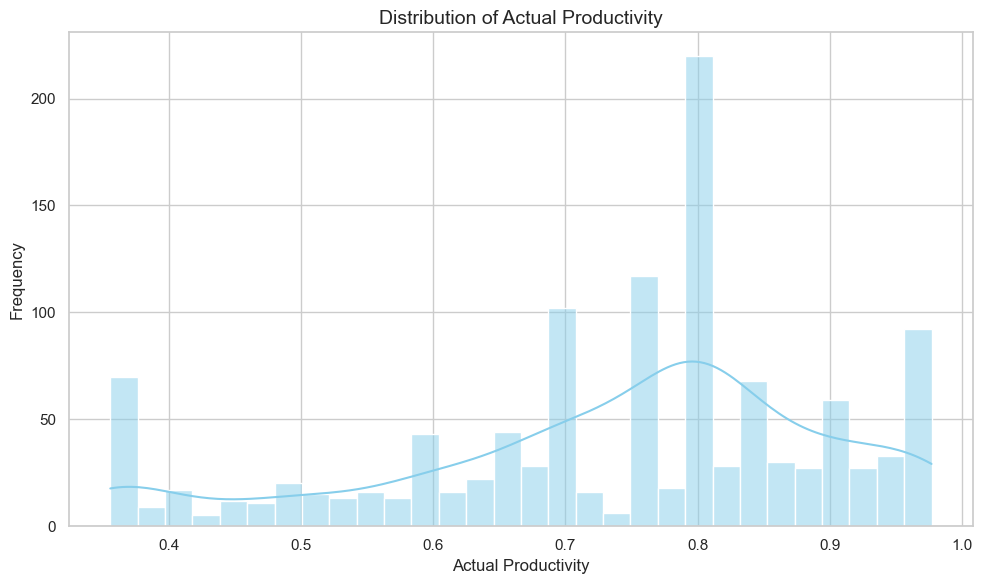

In [47]:
# Set seaborn style for better aesthetics
sns.set(style="whitegrid")
# Plot 1: Distribution of productivity
plt.figure(figsize=(10, 6))
sns.histplot(df['actual_productivity'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Actual Productivity", fontsize=14)
plt.xlabel("Actual Productivity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


### Interpretation
This histogram with KDE (Kernel Density Estimate) shows the distribution of the actual_productivity variable from the dataset.
The distribution of actual productivity is slightly right-skewed, with most values falling between 0.6 and 0.9. A noticeable peak around 0.8 suggests that many workers tend to reach or stay close to their productivity goals. Very low or high productivity scores are rare, indicating that extreme underperformance or overperformance is uncommon. This is normal since we corrected the outliers. Overall, the graph shows a relatively stable and consistent productivity level among workers.

## 5.2 Boxplot per department


/var/folders/rc/dl933q5j5zg5w7ctcfzz19k00000gn/T/ipykernel_26907/3499135081.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='department', y='actual_productivity', palette='Set2')


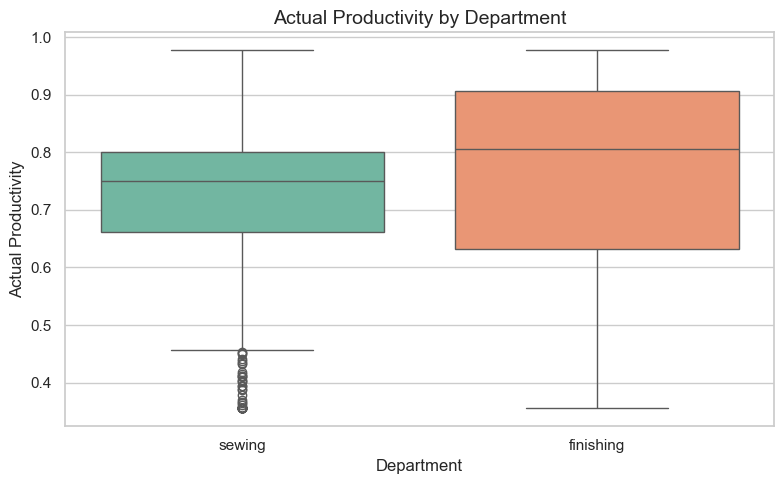

In [50]:
# Plot 2: Productivity by department after correction
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='department', y='actual_productivity', palette='Set2')
plt.title("Actual Productivity by Department", fontsize=14)
plt.xlabel("Department")
plt.ylabel("Actual Productivity")
plt.tight_layout()
plt.show();


## 5.3 Productivity overtime

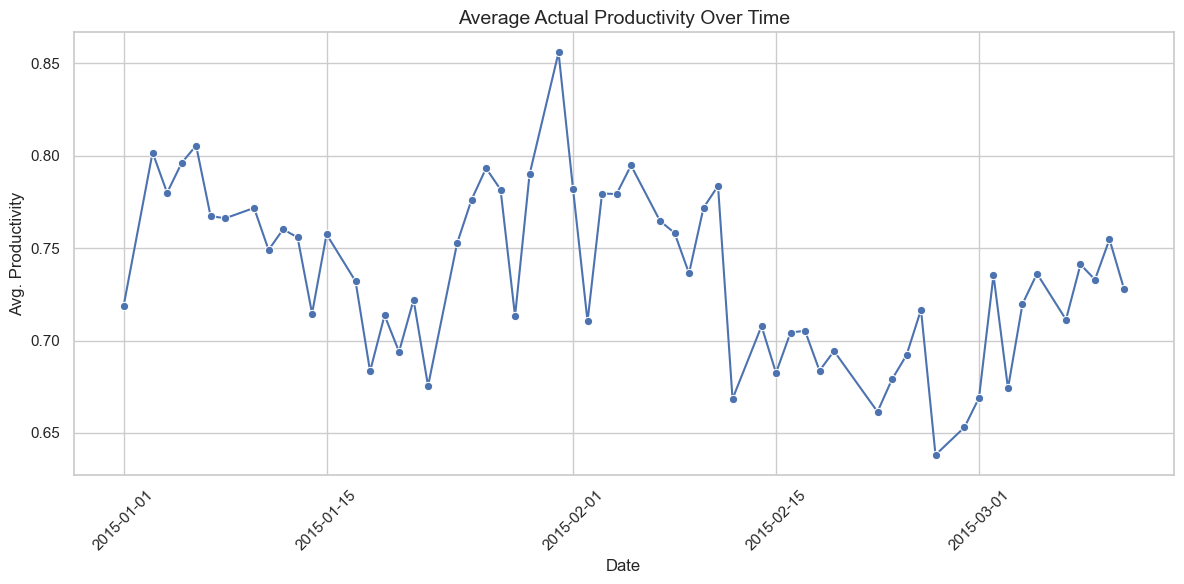

In [52]:
# Plot 3: Productivity over time
plt.figure(figsize=(12, 6))
df_grouped = df.groupby('date')['actual_productivity'].mean().reset_index()
sns.lineplot(data=df_grouped, x='date', y='actual_productivity', marker='o')
plt.title("Average Actual Productivity Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Avg. Productivity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Interpretation
We observe that during the database period, the average actual productivity has increased and reached peaks of up to 87% (at the end of January 2015) but also decreased (60% aproximately at the end of February 2015)

## 5.4 Productivity vs number or workers

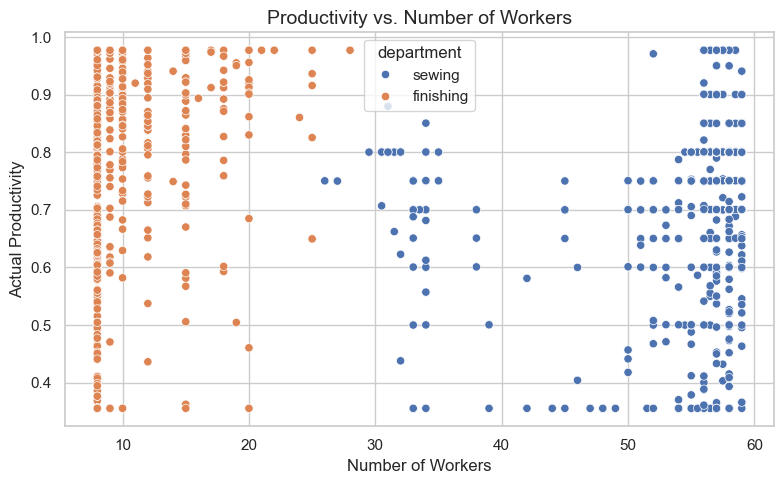

In [55]:
# Plot 4: Productivity vs. number of workers
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='no_of_workers', y='actual_productivity', hue='department')
plt.title("Productivity vs. Number of Workers", fontsize=14)
plt.xlabel("Number of Workers")
plt.ylabel("Actual Productivity")
plt.tight_layout()
plt.show()

### Interpretation
This graphic explores whether teams with more workers perform better or worse.
At first glance, the graph suggests that the number of people positively affects productivity, which goes against the law of diminishing marginal returns in some economic theories (Classical Economics). This could happen and be explained if there are factors like technological improvements (Endogenous Growth Theory), better organization, or increasing returns to scale (Economies of Scale), where adding more workers leads to higher productivity, at least temporarily. Additionally, the relationship might not be linear, and other variables could be influencing the result, masking the diminishing returns effect.
We will see after that this graph is misleading at some point with contrast with the heatmap correlation.

## 5.5 Heatmap correlation

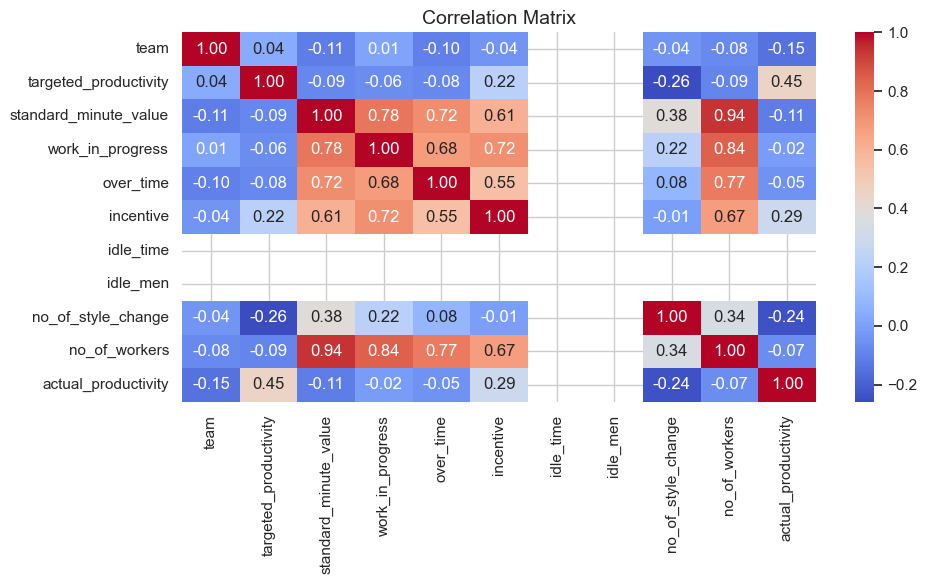

In [58]:
# Plot 5: Heatmap of correlation
plt.figure(figsize=(10, 6))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix", fontsize=14)
plt.tight_layout()
plt.show()

### Interpretation
This graph helps understand relationships between numeric variables (e.g., productivity, over time, idle time, etc.)
This joins the conclusions of the missing values ​​and the fact that wip is correlated with other variables in the table with the regression made before. This correlation indicates us that the other method of handling missing values would work, too.
In the heatmap, we observe a negative correlation of -0.07 between the actual productivity and the number of workers as well, indicating that as the number of people increases, productivity tends to decrease. This could reflect the law of diminishing marginal returns (Classical Economics), where adding more labor leads to less additional output per worker, especially when other factors, like capital, remain constant. This suggests that after a certain point, overcrowding or inefficiencies may arise, causing a decline in productivity.
Therefore, the other graph that showed a positive relationship between the number of people and productivity was misleading.

This highlights the limits of simple visualizations and shows that specifying a proper model to predict our variable of interest and conducting hypothesis tests is necessary to draw more reliable conclusions.


In [60]:
# For idle_time
print(df['idle_time'].describe())

# For idle_men
print(df['idle_men'].describe())


count    1197.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: idle_time, dtype: float64
count    1197.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: idle_men, dtype: float64


As for the idle_men and idle_time coefficient in the heatmap, the variables are indeed numeric and included in the correlation matrix, but all their correlation coefficients appear as NaN when running the code on top. This happens because these columns are almost constant (or completely constant) across all rows in the database.

In statistical terms, Pearson's correlation coefficient cannot be calculated when a variable has zero variance — that is, when it doesn't change. Mathematically, this causes a division by zero in the correlation formula. This lack of variability results from the outlier correction applied to these columns by the winsorization method. By limiting the outliers, winsorization reduced the dispersion of the idle_men and idle_time values ​​so drastically that they became almost constant from one observation to the next, making it impossible to calculate significant correlation coefficients. This is one of the limitations of the winsorization method.

# 6. Identifying Trends and Formulating Hypotheses
Based on the initial visualizations and correlations, we identified several patterns worth testing more formally using a statistical model. While plots gave us a general sense of the data structure, they can be misleading or fail to capture underlying effects due to interactions or confounding variables. To address this, we chose an Ordinary Least Squares (OLS) regression as a baseline model to predict actual_productivity based on the other available variables in the dataset.

The OLS model allows us to estimate the marginal effect of each variable while controlling for others, helping to distinguish real trends from misleading visual impressions. It also provides statistical tests (such as p-values and confidence intervals) to validate or reject our initial assumptions.

Here are a few hypotheses we aim to test through this model and statistical inferences :

Hypothesis 1: Employees working in the "sewing" department are less productive than those in other departments.

Hypothesis 2: Higher targeted productivity is associated with higher actual productivity (to be tested through regression coefficients).
By testing these hypotheses within a formal model, we can better understand which factors significantly influence productivity and move beyond visual intuition.



# 7. Conducting the analysis
Firstly, before starting to add an OLS model, we must first look at the VIF variables and to know what variables are correlated with each other. Our goal is to have an OLS model with a high R-Squared, this indicates how much of our actual productvity is explained using our model, while having a low colinearity.

# 7.1. Check Multicolinearity

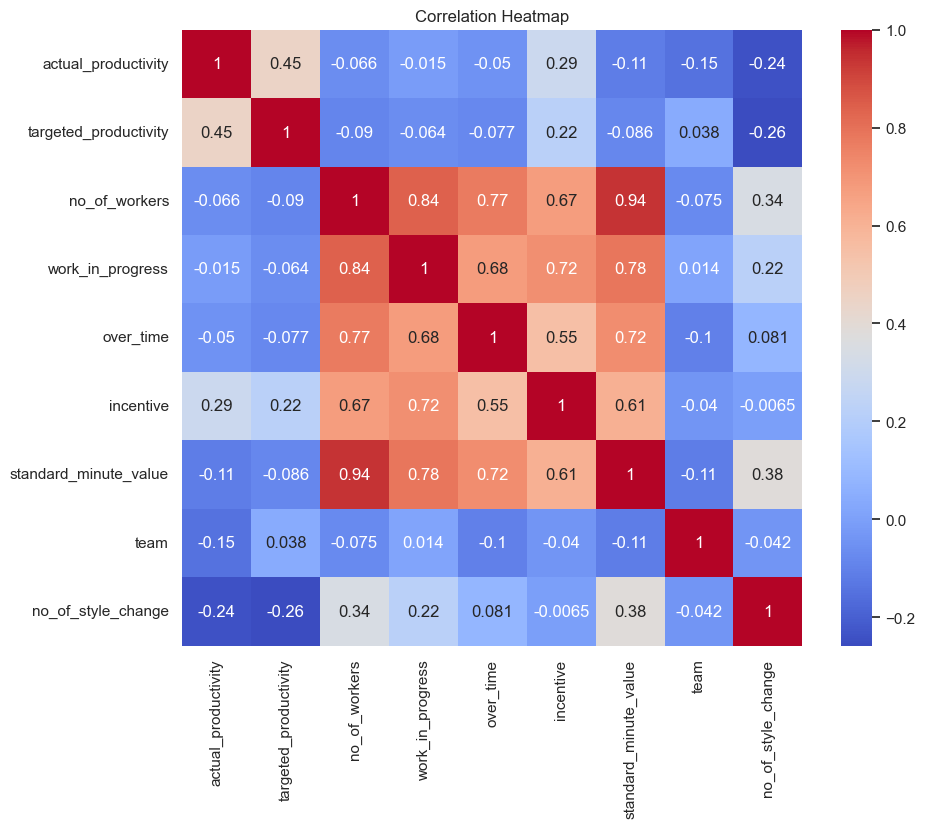

In [65]:
# Variables for collinearity check
columns = ['actual_productivity','targeted_productivity', 'no_of_workers',
           'work_in_progress', 'over_time', 'incentive', 'standard_minute_value','team','no_of_style_change']

# Standardize numerical data
df_std = pd.DataFrame()
for c in columns:
    m = df[c].mean()
    sd = df[c].std()
    df_std[c] = df[c].apply(lambda x: (x-m)/sd)


# 6. Correlation Heatmap — Visual diagnostics
corr = df_std.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
#Purpose:

#Helps visually assess pairwise linear relationships among numeric variables. You want to avoid clusters of high correlation (e.g., > 0.8) unless handled via transformation or removal.
#This step prepares the data for multicollinearity diagnostics (e.g., VIF check). We standardize so that correlation structure is clear and interpretable.

In [66]:
for i in range(len(columns)):
    print(f"VIF for {columns[i]}: {vif(df_std, i)}")

VIF for actual_productivity: 1.5227397567497207
VIF for targeted_productivity: 1.3901748108457685
VIF for no_of_workers: 13.201025746996821
VIF for work_in_progress: 4.187203549389705
VIF for over_time: 2.763689595933709
VIF for incentive: 3.038712679768695
VIF for standard_minute_value: 9.24354324055887
VIF for team: 1.1057220204379739
VIF for no_of_style_change: 1.494390129144547


Multicollinearity occurs when independent variables in a regression model are highly correlated, which can distort the estimation of coefficients and reduce the interpretability of the model. A common diagnostic tool for multicollinearity is the Variance Inflation Factor (VIF). As a rule of thumb:

- VIF > 10 indicates severe multicollinearity.

- VIF between 5 and 10 indicates moderate multicollinearity that should be monitored.

Key Findings from the VIF and Correlation Analysis
- no_of_workers shows a VIF above 10, signaling strong multicollinearity. This suggests that it shares a large portion of variance with other predictors, which may lead to unreliable coefficient estimates.

- standard_minute_value (SMV) exhibits a VIF close to 9, indicating notable collinearity, though not critical. This variable, however, remains statistically significant and meaningful in the context of productivity modeling.

To identify the root of this multicollinearity, we turned to the correlation matrix and found:

- work_in_progress correlated 0.84 with no_of_workers

- standard_minute_value correlated 0.94 with no_of_workers

This tells us:

- These variables are strongly linearly related, meaning they may carry redundant information.

- standard_minute_value has a higher correlation (0.94) with no_of_workers than work_in_progress (0.84), implying it overlaps more with what no_of_workers is already explaining.

However, in practice:

- standard_minute_value is often a core production planning metric and tends to be more stable and interpretable than work_in_progress.

- work_in_progress can be volatile or lagging, especially if it reflects tasks partially completed across shifts or departments.

Additional Correlation:
- over_time showed a correlation of 0.72 with no_of_workers, meaning the number of workers on duty is strongly associated with the amount of overtime logged — which intuitively makes sense, but it adds further collinearity.

Decision: Variable Removal
To reduce multicollinearity while retaining explanatory power:

- We removed work_in_progress, keeping standard_minute_value since it’s more indicative of production effort.

- We removed over_time, as its explanatory effect is largely captured by no_of_workers — keeping both could distort the model’s interpretation.

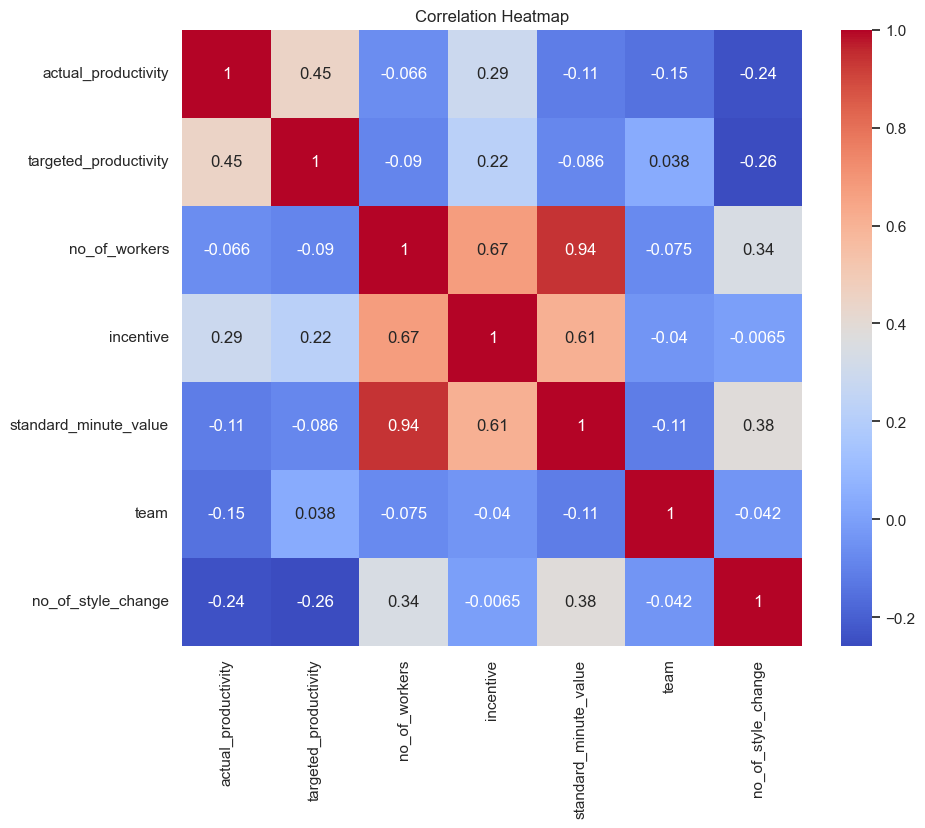

In [68]:
# Variables for collinearity check
columns = ['actual_productivity','targeted_productivity', 'no_of_workers',
         'incentive', 'standard_minute_value','team','no_of_style_change']

# Standardize numerical data
df_std = pd.DataFrame()
for c in columns:
    m = df[c].mean()
    sd = df[c].std()
    df_std[c] = df[c].apply(lambda x: (x-m)/sd)


# 6. Correlation Heatmap — Visual diagnostics
corr = df_std.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
#Purpose:

#Helps visually assess pairwise linear relationships among numeric variables. You want to avoid clusters of high correlation (e.g., > 0.8) unless handled via transformation or removal.
#This step prepares the data for multicollinearity diagnostics (e.g., VIF check). We standardize so that correlation structure is clear and interpretable.

In [69]:
for i in range(len(columns)):
    print(f"VIF for {columns[i]}: {vif(df_std, i)}")

VIF for actual_productivity: 1.5171720773042456
VIF for targeted_productivity: 1.3631796025139968
VIF for no_of_workers: 10.32600571842453
VIF for incentive: 2.6040940154056327
VIF for standard_minute_value: 9.223378724359915
VIF for team: 1.0742086448996633
VIF for no_of_style_change: 1.345771009640699


After removing the variables work_in_progress and over_time, we observed a decrease of 3 points in the VIF for no_of_workers, bringing it close to but still slightly under the critical threshold of 10. This confirms our earlier suspicion: these variables were contributing significantly to multicollinearity by overlapping in the information they provided about no_of_workers.

Although the VIF for no_of_workers is still high, it's now at an acceptable boundary. In practice, VIFs slightly below or around 10 can be tolerated when:

- The variable is theoretically important (as no_of_workers clearly is in a productivity model),

- Removing it would reduce the interpretability or predictive power of the model,

- And when the rest of the variables show low multicollinearity, as is the case here.

It's also important to note that a VIF of exactly 10 is not an absolute cutoff — it’s a rule of thumb. The decision to retain a variable depends not only on numerical thresholds but also on its relevance to the domain and model objectives.

In this case:

- no_of_workers is a key operational variable — excluding it would strip the model of crucial explanatory power regarding human resource inputs.

- With the collinear variables removed, the remaining features show limited redundancy with no_of_workers.

- Thus, retaining it despite a borderline VIF is statistically and contextually justified.

# 8. Interpreting analysis results

In [72]:
# 5. OLS Model — Build the regression
ols_model = smf.ols(formula='''
    actual_productivity ~
    targeted_productivity +
    C(quarter) +
    C(day) +
    C(department) +
    standard_minute_value +
    no_of_workers +
    no_of_style_change +
    C(team) +
    incentive
''', data=df)

ols_result = ols_model.fit()
print(ols_result.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.389
Model:                             OLS   Adj. R-squared:                  0.375
Method:                  Least Squares   F-statistic:                     28.66
Date:                 Wed, 08 Oct 2025   Prob (F-statistic):          3.08e-106
Time:                         11:10:18   Log-Likelihood:                 749.17
No. Observations:                 1197   AIC:                            -1444.
Df Residuals:                     1170   BIC:                            -1307.
Df Model:                           26                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept       

So as we can see we sucessfully have a 40.3% R-Squared whilst having no multicolinearity. We can now argue on our previous Hypothesis.

Hypothesis 1 : We suspected that the sewing department was going to lower the actual_productivity. Indeed, as we can see we have a coefficent that is negative indicating the negative correlation with the actual_productivity. In addition to that, the P-Value is well under 5% showing that it is significant and the value 0 for this coefficent has 95% chance of not happening.

Hypothesis 2 : We wanted to know if the targeted_productivity had any positive relations with the actual_productivity. As we can see there, the coefficent of the explicative variable has a P-Value less than 5%, showing its importance, and a Betta of 0.5581 making the actual_productivity increase when the targeted_productivity would.

# 10. Limits

Model Evaluation and Potential Limitations
After processing the dataset and performing an Ordinary Least Squares (OLS) regression, we achieved an R² score of 40.3%, meaning that approximately 40.3% of the variance in actual_productivity is explained by our model. While this is a reasonable result for a first-pass model, it also indicates that a large portion (59.7%) of the variance remains unexplained. Below, we examine possible reasons for this and identify areas for further improvement.

#### Handling of Missing Values
We chose to impute missing values (especially in work_in_progress) by replacing them with 0. While this simplification ensured a complete dataset, it may have introduced bias:

- Zero imputation assumes no ongoing work when, in reality, the value may have simply been unrecorded or delayed in entry.

- This could result in the loss of valuable signal from work_in_progress, weakening its influence in the regression model.

- A more nuanced imputation method (e.g., group mean, interpolation, or predictive imputation) might retain more information.

#### Outlier Treatment via Winsorization
To mitigate the impact of extreme values, we applied winsorization, capping the data within a specific percentile range. While this helps in reducing noise, it may have had unintended side effects:

- It reduced the variability in key columns such as idle_time, idle_men, and no_of_style_change.

- Post-winsorization, these variables had compressed value ranges, limiting their contribution to the model.

- In cases where outliers carry genuine insight (e.g., high idle time reflecting actual inefficiencies), winsorization can obscure the relationship.

Still, this step remains important for improving model stability and reducing heteroscedasticity.

#### Omission of Key Variables
Several potentially important features were not available in the dataset. These omitted variables could explain the unexplained variance in productivity:

- Worker experience level – Experienced workers tend to be more productive.

- Machine efficiency or age – Older or malfunctioning machinery may reduce output.

- Shift timing (day/night) – Productivity often varies by shift.

- Stress or workload scores – Human factors play a large role in productivity.

- Supervisor presence or ratio – Oversight can drive performance.

- Garment complexity/type – Difficult designs require more time, lowering productivity.

- Break patterns – Irregular or insufficient breaks may affect output.

Incorporating these variables could significantly improve the model's predictive power.

#### Assumption of Linearity in OLS
The OLS model assumes linear relationships between predictors and the outcome. This limits our ability to capture more complex, non-linear patterns. For example:

- Variables like standard_minute_value or over_time may exhibit diminishing returns (concave) or threshold effects (convex).

- Transformations such as logarithmic, polynomial, or spline terms could model these effects better.

Exploring non-linearity could enhance model fit without sacrificing interpretability.

#### Lack of Machine Learning Models
While OLS offers clear interpretability, it may not capture intricate interactions or non-linear dependencies. Machine learning models like:

- Random Forests or Gradient Boosting Machines can model complex relationships.

- These models can yield higher predictive accuracy, even with imperfect or noisy data.

- They are less affected by multicollinearity and can highlight feature importance without the strict assumptions of OLS.

However, their downside is the lack of transparency, especially for decision-making that relies on clear causal understanding.

#### Conclusion and Next Steps
In summary, while our OLS model offers valuable insight, its performance is limited by:

- Simplistic handling of missing data

- Potentially over-aggressive outlier filtering

- Missing explanatory variables

- Unexplored non-linear effects

- Absence of advanced predictive models

Next steps could include:

- Revisiting missing data handling strategies

- Testing non-linear transformations

- Including interaction terms

- Comparing with machine learning models for prediction

- Collecting or engineering additional explanatory features

# 11 Non-Linearity relationships

We have tried to have relations of non_linerity with some of the variables giving us an explication of the actual-productivity of about 48% without multi-colinearity, making it a good model. We found these results by searching for possible non-linearity relationships. Here's the code.

In [78]:
#First we need to make the new variables that may be important
df['target_bin'] = pd.qcut(df['targeted_productivity'], q=4, labels=False, duplicates='drop')
df['wip_log'] = np.log1p(df['work_in_progress'])
df['no_w_log'] = np.log1p(df['no_of_workers'])
df['over_time_bin'] = pd.qcut(df['over_time'], q=4)
df['month'] = df['date'].dt.month
df['smv_x_dept'] = df['standard_minute_value'] * df['department'].astype('category').cat.codes

In [79]:
ols_model = smf.ols(formula='''
    actual_productivity ~
    C(target_bin) +
    C(department) * targeted_productivity +
    wip_log +
    no_w_log +
    C(quarter) +
    C(month) * C(department) +
    C(no_of_style_change) +
    C(day) +
    C(team) +
    smv_x_dept +
    C(incentive)
''', data=df)

ols_result = ols_model.fit()
print(ols_result.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.483
Model:                             OLS   Adj. R-squared:                  0.453
Method:                  Least Squares   F-statistic:                     15.98
Date:                 Wed, 08 Oct 2025   Prob (F-statistic):          1.49e-119
Time:                         11:10:18   Log-Likelihood:                 848.85
No. Observations:                 1197   AIC:                            -1564.
Df Residuals:                     1130   BIC:                            -1223.
Df Model:                           66                                         
Covariance Type:             nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [114]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
